In [2]:
import pandas as pd
import numpy as np
import os

years_DepEP = []

# loop through the csvs in data/DepEP and add the dataframe to the list
for file in os.listdir('data/DepEP'):
    if file.endswith('.csv'):
        years_DepEP.append(pd.read_csv('data/DepEP/' + file))

# print some info about the dataframes
len(years_DepEP), years_DepEP[0].shape, years_DepEP[0].columns

(23,
 (46, 4),
 Index(['Department of Environmental Protection 2000 Revenues', ' 1998 Actual',
        ' 1999 Estimated', ' 2000 Estimated'],
       dtype='object'))

In [12]:
# for each of the things in years create a new data frame with the sum of all funding resources
sums_DepEP = {}
for year in years_DepEP:
    column = year.columns[1]

    # convert to numeric
    year[column] = pd.to_numeric(year[column], errors='coerce')
    sums_DepEP[int(column.split(' ')[1])] = year[column].sum()

sums_DepEP

{1998: 92870,
 1999: 98178,
 2000: 101864,
 2001: 87857,
 2002: 116839.0,
 2003: 105399,
 2004: 127820.0,
 2005: 118534,
 2006: 138993,
 2007: 155989,
 2008: 144541,
 2009: 158757,
 2010: 143841,
 2011: 145429,
 2012: 136194.0,
 2013: 147103.0,
 2014: 183043,
 2015: 136928,
 2016: 153732,
 2017: 153846,
 2018: 149535,
 2019: 145024,
 2020: 135267}

In [13]:
# convert the dictionary to a dataframe
sums_DepEP_df = pd.DataFrame.from_dict(sums_DepEP, orient='index', columns=['Total Funding'])
sums_DepEP_df

,Total Funding
1998,92870.0
1999,98178.0
2000,101864.0
2001,87857.0
2002,116839.0
2003,105399.0
2004,127820.0
2005,118534.0
2006,138993.0
2007,155989.0


<Axes: title={'center': 'Total Funding for Department of Energy Environmental Programs'}>

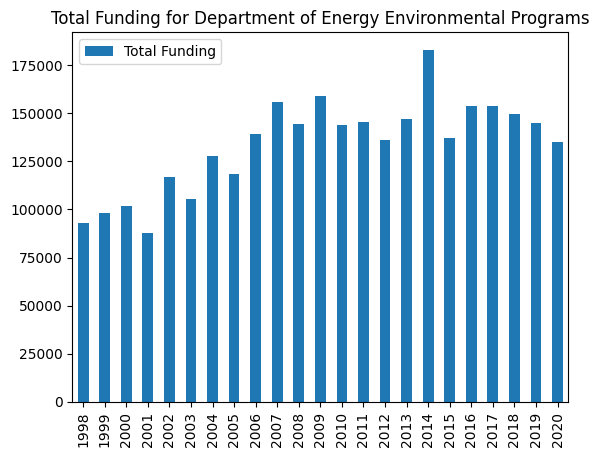

In [16]:
# plot the data
sums_DepEP_df.plot(kind='bar', title='Total Funding for Department of Energy Environmental Programs')

In [17]:
years_DepEPFedRev = []

# loop through the csvs in data/DepEPFedRev and add the dataframe to the list
for file in os.listdir('data/DepEPFedRev'):
    if file.endswith('.csv'):
        years_DepEPFedRev.append(pd.read_csv('data/DepEPFedRev/' + file))

# print some info about the dataframes
len(years_DepEPFedRev), years_DepEPFedRev[0].shape, years_DepEPFedRev[0].columns

(23,
 (30, 4),
 Index(['Department of Environmental Protection 2000 Revenues', ' 1998 Actual',
        ' 1999 Estimated', ' 2000 Estimated'],
       dtype='object'))

In [18]:
# for each of the things in years create a new data frame with the sum of all funding resources
sums_DepEPFedRev = {}
for year in years_DepEPFedRev:
    column = year.columns[1]

    # convert to numeric
    year[column] = pd.to_numeric(year[column], errors='coerce')
    sums_DepEPFedRev[int(column.split(' ')[1])] = year[column].sum()

sums_DepEPFedRev

{1998: 38431,
 1999: 34679,
 2000: 35193,
 2001: 34549,
 2002: 42753,
 2003: 45771,
 2004: 47888,
 2005: 65911,
 2006: 55395,
 2007: 41612,
 2008: 62206,
 2009: 42772,
 2010: 49773,
 2011: 62271,
 2012: 56354,
 2013: 58928,
 2014: 40731,
 2015: 44521,
 2016: 43329,
 2017: 51302,
 2018: 41348,
 2019: 51021,
 2020: 43536}

In [19]:
# convert the dictionary to a dataframe
sums_DepEPFedRev_df = pd.DataFrame.from_dict(sums_DepEPFedRev, orient='index', columns=['Total Funding'])
sums_DepEPFedRev_df.head()

,Total Funding
1998,38431
1999,34679
2000,35193
2001,34549
2002,42753


<Axes: title={'center': 'Total Funding for Department of Energy Environmental Programs'}>

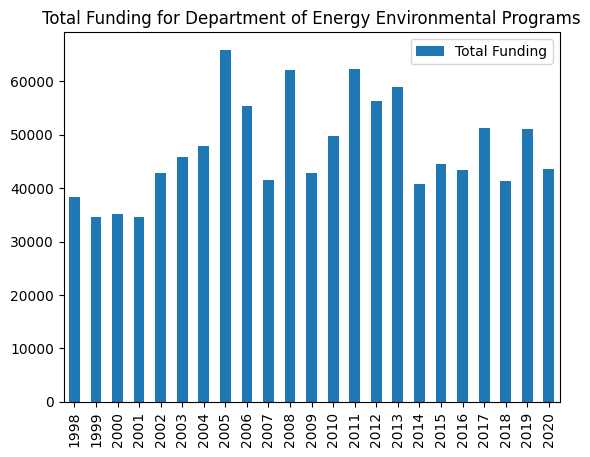

In [20]:
# plot the data
sums_DepEPFedRev_df.plot(kind='bar', title='Total Funding for Department of Energy Environmental Programs')

<Axes: >

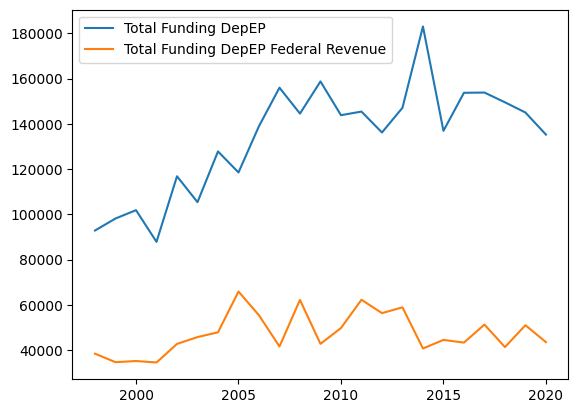

In [25]:
# make a grouped bar graph with the two dataframes
pd.concat(
    [
        sums_DepEP_df.rename(columns={'Total Funding': 'Total Funding DepEP'}),
        sums_DepEPFedRev_df.rename(columns={'Total Funding': 'Total Funding DepEP Federal Revenue'})
    ],
    axis=1
).plot.line()

In [ ]:
data = pd.read_csv('data/RGGIAuctions/auction.csv')
# make column numeric [' Clearing Price']
data[' Clearing Price'] = pd.to_numeric(data[' Clearing Price'], errors='coerce')
data.head()

,Auction,Date,Quantity Offered,CCR Sold,Quantity Sold,Clearing Price,Total Proceeds
76,Auction 1,2008-09-25,12565387,,12565387,3.07,38575738.09
75,Auction 2,2008-12-17,31505898,,31505898,3.38,106489935.24
74,Auction 3 (Future),2009-03-18,2175513,,2175513,3.05,
73,Auction 3,2009-03-18,31513765,,31513765,3.51,117248629.80
72,Auction 4 (Future),2009-06-17,2172540,,2172540,2.06,


In [18]:
data.describe()

,Quantity Offered,Quantity Sold,Clearing Price
count,7.700000e+01,7.700000e+01,75.000000
mean,2.036367e+07,1.849899e+07,5.608667
std,1.245300e+07,1.069966e+07,4.856922
min,1.864951e+06,0.000000e+00,1.860000
25%,1.359011e+07,1.336065e+07,1.990000
50%,1.623750e+07,1.623750e+07,4.000000
75%,2.859170e+07,2.427216e+07,5.885000
max,4.559597e+07,4.199581e+07,25.750000


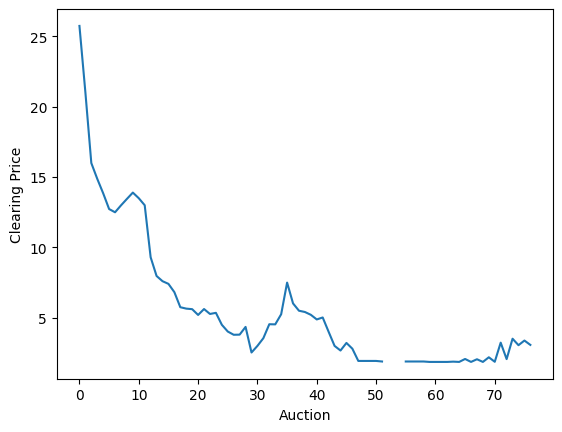

In [25]:
# graph the RGGI auction clearing prices
import matplotlib.pyplot as plt

plt.plot(
    # reverse the list so the auctions are in order
    data[' Clearing Price'].values[::-1]
)
plt.ylabel('Clearing Price')
plt.xlabel('Auction')
plt.show()